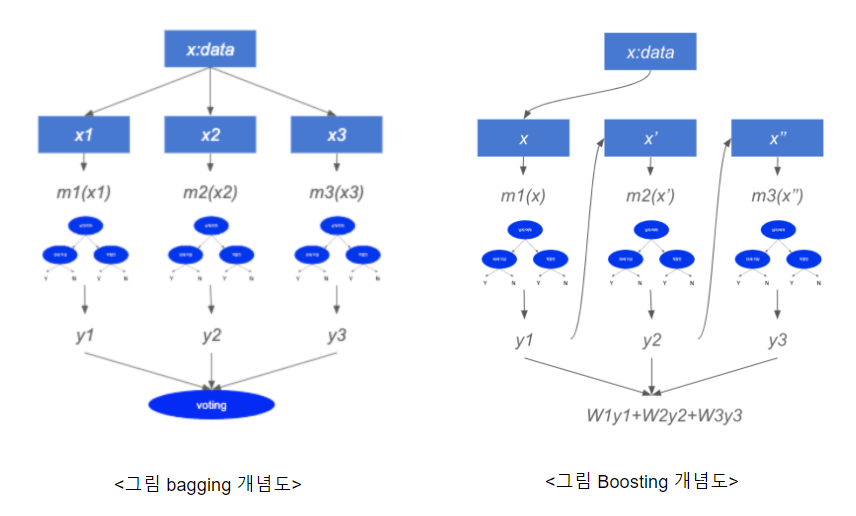

In [2]:
from PIL import Image
im1 = Image.open('im1-ML4.png')
im1

# XGBoost
  - Gradient Boosting 알고리즘을 분산환경에서도 실행할 수 있도록 구현해놓은 알고리즘
  - 여러개의 Decision Tree를 조합해서 사용하는 Ensemble 알고리즘
  - gbm보다 빠르다
  - 과적합 방지가 가능한 규제가 포함되어 있다
  - CART(Classification And Regression Tree)를 기반으로 한다
  - 조기 종료를 제공한다(early_stopping_rounds)
  - best_score_ : 최고 스코어(정확도), best_params_ : 최고 파라미터

* xgboost 하이퍼파라미터

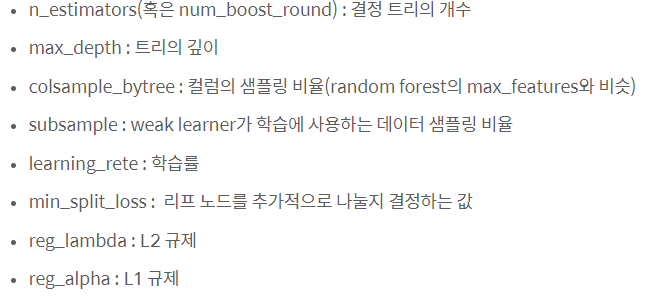

In [3]:
from PIL import Image
im2 = Image.open('im2-ML4.png')
im2

# Lightgbm
  - xgboost의 느린 속도를 보완하기 위해 나옴
  - 다른 모델들보다 더 적은 자원(메모리 등)을 사용해 빠름
  - gpu지원
  - 너무 적은 수의 데이터를 사용하면 과적합이 발생할 수 있음
  - 기존 트리 모델의 깊이 줄이는 방법으로 level-wise 방법이 아닌 leaf wise(리프 중심) 트리 분할을 사용
    * level-wise : 균형을 잡아주며 깊이 조절 > 균형을 잡기 위한 연산 시간이 소모됨
    * leaf-wise : 트리의 균형은 맞추지 않고 리프 노드를 지속적으로 분할하면서 진행, 비대칭적이고 깊은 트리가 생성되지만 동일한 leaf를 생성할 때 level-wise보다 손실을 줄일 수 있다
  - early_stopping_rounds, eval_set, eval_metric 지원
  - 변수 중요도 시각화
  > plot_importance(lgb)

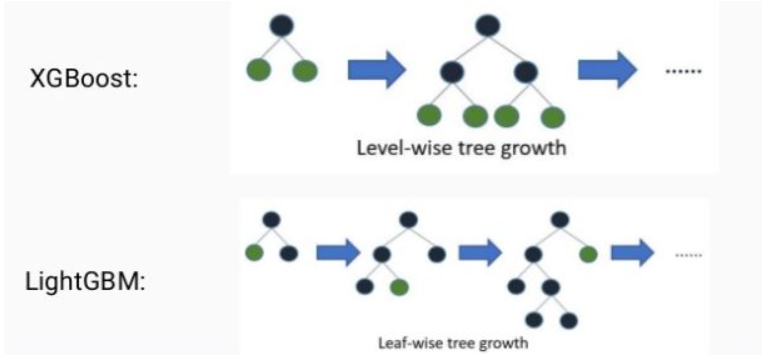

In [6]:
from PIL import Image
im3 = Image.open('im3-ML4.png')
im3

* lgbm 하이퍼파라미터

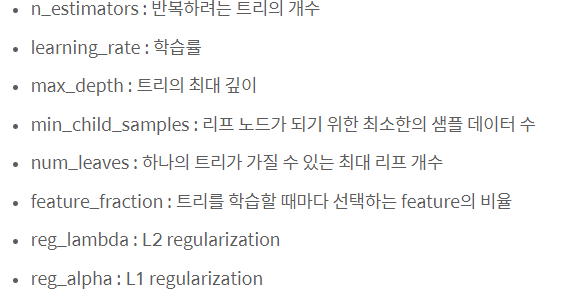

In [7]:
from PIL import Image
im4 = Image.open('im4-ML4.png')
im4

# Catboost
  - XGBoost와 동일하게 level-wise로 트리를 만들어간다
  - Ordered Boosting<br>
    : 기존의 부스팅 모델이 일괄적으로 모든 훈련 데이터를 대상으로 잔차를 계산했다면 catboost는 일부만 가지고 잔차를 계산한 뒤, 이걸로 모델을 만들고, 그 뒤에 데이터의 잔차는 이 모델로 예측한 값을 사용함 > 과적합 방지
  - random permutation <br>
    : ordered boosting을 할 때, 데이터 순서를 섞어주지 않으면 매번 같은 순서대로 잔차를 예측 > 데이터 셔플링하여 뽑음(과적합 방지를 위해 모든 데이터가 아닌 일부를 뽑음)
  - ordered target encoding<br>
    : target encoding = mean encoding = response encoding(카테고리형 변수를 그룹화 하여 타겟 변수 평균 냄)
    * 이 경우 data leakage 문제(타겟이 훈련 셋에 들어가 과적합)가 발생
    > 해결책으로 현재 데이터 인코딩을 할 때 이전 데이터들의 인코딩된 값을 사용한다.(누적, 현재 값 사용x)<br>
      현재 데이터의 타겟 값을 사용하지 않고 이전 데이터들의 타겟 값만을 사용하기 때문에 data leakage가 일어나지 않음
      
  - 범주형 변수를 항상 target encoding을 하는 것은 아니고 낮은 cardinality를 가지는 범주형 변수에 한해서 one-hot-encoding
  - 기본 파라미터가 최적화가 잘 되어있어서 파라미터 튜닝에 크게 신경 쓰지 않아도 됨(내부적 알고리즘으로 이미 트리의 다형성과 과적합을 방지)
  - 한계<br>
    1) sparse한 matrix는 처리하지 못한다
    2) 데이터 대부분이 수치형 변수인 경우 Light GBM보다 학습 속도가 느리다